In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [6]:
data = pd.read_csv('dataset/telco.csv')

display(data.head(2).T)

,0,1
Customer ID,8779-QRDMV,7495-OOKFY
Gender,Male,Female
Age,78,74
Under 30,No,No
Senior Citizen,Yes,Yes
Married,No,Yes
Dependents,No,Yes
Number of Dependents,0,1
Country,United States,United States
State,California,California


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

[]

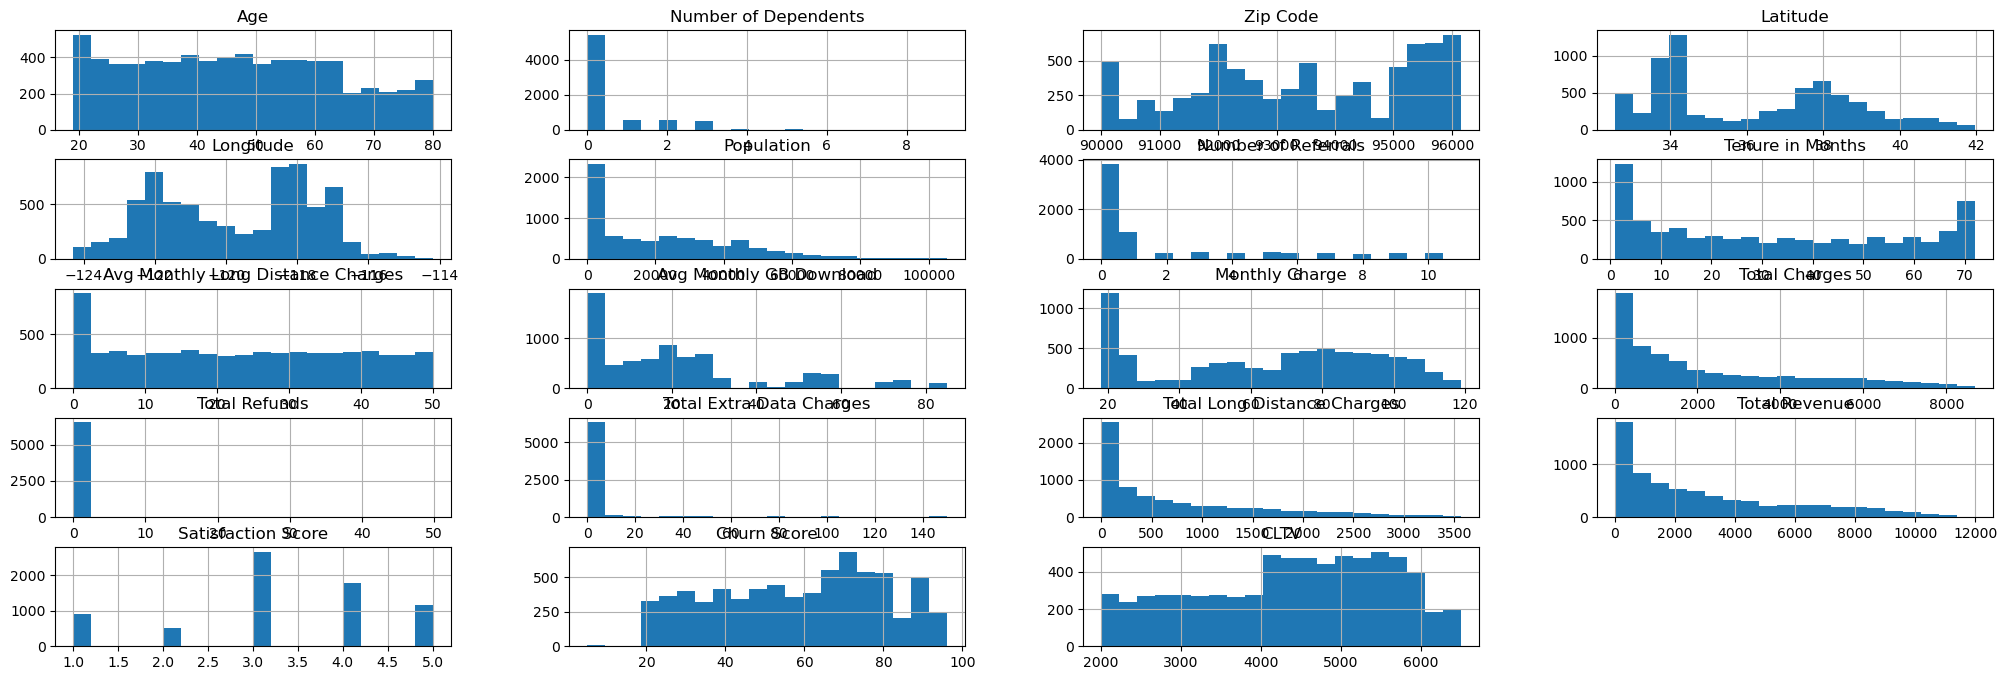

In [14]:
data.hist(bins=20,figsize = (25,8))
plt.plot()

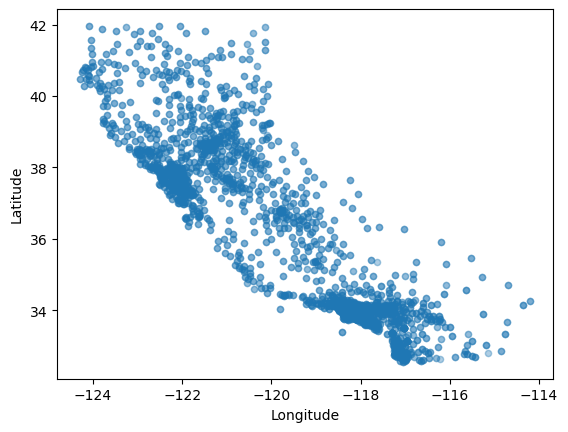

In [17]:
data.plot(kind = 'scatter' ,x = 'Longitude',y = 'Latitude',grid  = False,alpha = 0.2)
plt.show()

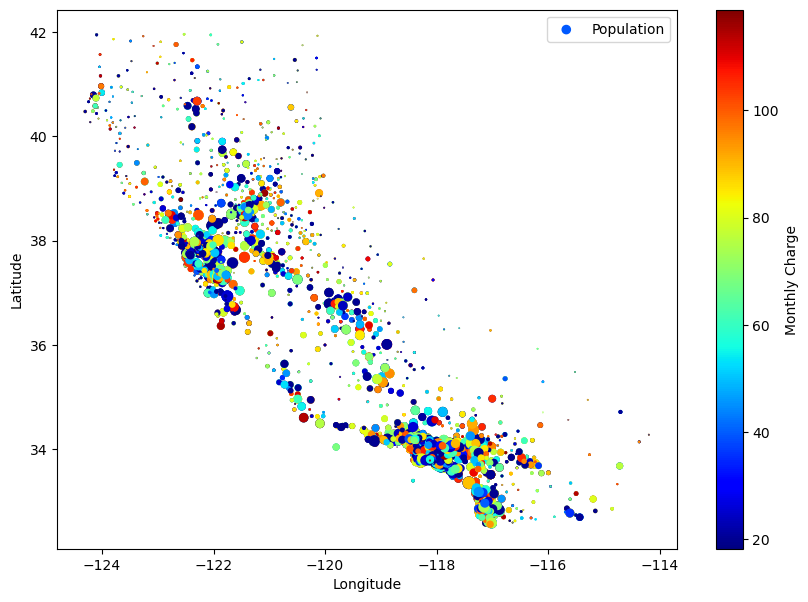

In [18]:
data.plot(kind = 'scatter',x = 'Longitude',y = 'Latitude',grid  = False, s = data['Population']/1500, label = 'Population',
         c = 'Monthly Charge', cmap = 'jet',colorbar = True,legend = True,sharex = False,figsize = (10,7))
plt.show()

In [22]:
def dataFrame_summary(df):
    print(f'data shape : {df.shape}')
    summ = pd.DataFrame(df.dtypes,columns = ['datatype'])
    summ['#missing'] = df.isnull().sum().values
    summ['%missing'] = df.isnull().sum().values/len(df) * 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include = 'all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['average'] = desc['mean'].values
    summ['standar_deviation'] = desc['std'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values
    
    return summ

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(data.drop(['Churn Label'],axis = 1),data['Churn Label'],test_size = 0.2, shuffle = True,stratify = data['Churn Label'],random_state= 42)


In [24]:
dataFrame_summary(X_train).style.background_gradient(cmap = 'YlOrBr')

data shape : (5634, 49)


,datatype,#missing,%missing,#unique,min,max,average,standar_deviation,first value,second value,third value
Customer ID,object,0,0.000000,5634,nan,nan,nan,nan,8779-QRDMV,7495-OOKFY,1658-BYGOY
Gender,object,0,0.000000,2,nan,nan,nan,nan,Male,Female,Male
Age,int64,0,0.000000,62,19.000000,80.000000,46.551651,16.804826,78,74,71
Under 30,object,0,0.000000,2,nan,nan,nan,nan,No,No,No
Senior Citizen,object,0,0.000000,2,nan,nan,nan,nan,Yes,Yes,Yes
Married,object,0,0.000000,2,nan,nan,nan,nan,No,Yes,No
Dependents,object,0,0.000000,2,nan,nan,nan,nan,No,Yes,Yes
Number of Dependents,int64,0,0.000000,10,0.000000,9.000000,0.468051,0.967495,0,1,3
Country,object,0,0.000000,1,nan,nan,nan,nan,United States,United States,United States
State,object,0,0.000000,1,nan,nan,nan,nan,California,California,California
